## Визуализация данных средствами Matplotlib и Seaborn

### Визуализация средствами PyPlot

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4] #в дюймах!
plt.rcParams['figure.dpi'] = 100

Самое простое и быстрое построение графика по значениям ординат (абсциссы принимают порядковые значения)

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

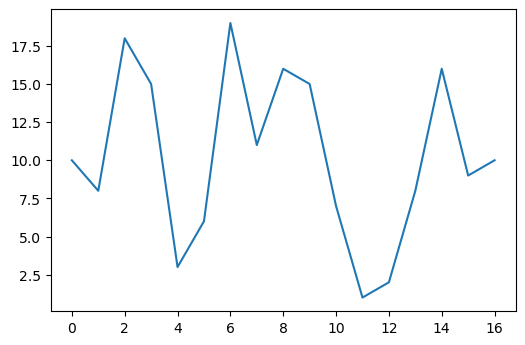

In [7]:
x = [10,8,18,15,3,6,19,11,16,15,7,1,2,8,16,9,10]
plt.plot(x)
plt.show()

Задать подписи к осям:

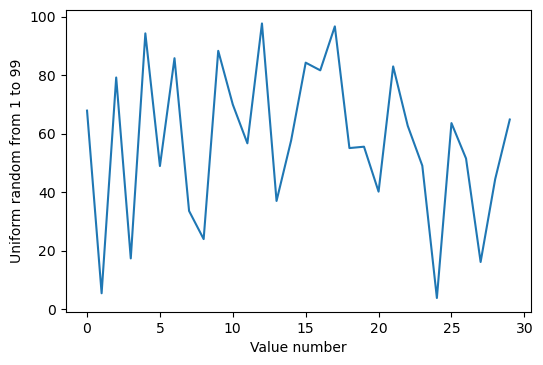

In [21]:
import numpy as np
x = np.random.uniform(1, 100, 30)
plt.plot(x)
plt.ylabel("Uniform random from 1 to 99")
plt.xlabel("Value number")
plt.show()

Изменение диапазонов и сетки осей:

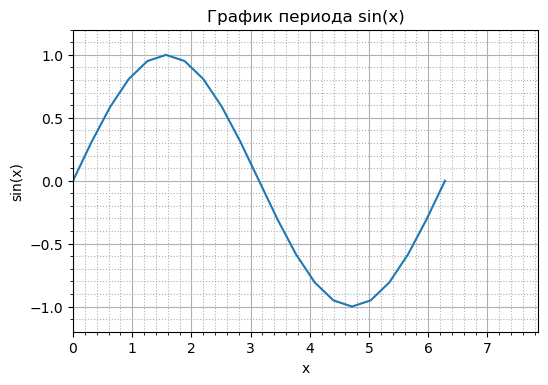

In [82]:
import math
x = np.arange(0, np.pi * 2.1, np.pi / 10)
y = np.array([math.sin(v) for v in x]) #функция numpy.sin(x) может принимать вектор и возвращает вектор! 

plt.plot(x, y)
plt.ylabel("sin(x)")
plt.xlabel("x")
plt.title("График периода sin(x)")
plt.axis(np.array( [x[0], np.pi * 2.5, -1.2, 1.2 ] )) # [x_min, x_max, y_min, y_max]
#plt.yticks(np.arange(-1.2, 1.2, 0.2))
#plt.xticks(np.arange(0, np.pi * 2.2, np.pi / 4), rotation = 90)

plt.grid(which="major")
plt.minorticks_on()
plt.grid(which="minor", linestyle=":")
plt.show()

#### Формы графиков

Точечный график:


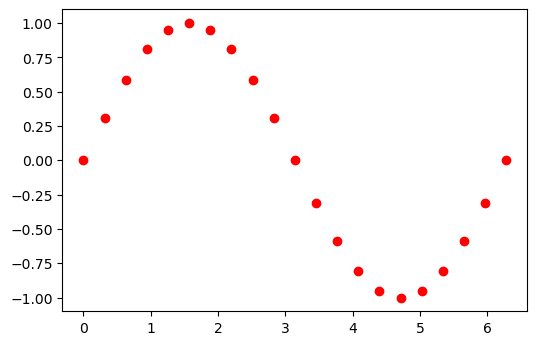

In [32]:
plt.plot(x,y, "ro") #красные кружочки
plt.show()

Несколько графиков можно объединить в одной функции **plot()**, или строить в одной плоскости отдельными вызовами:

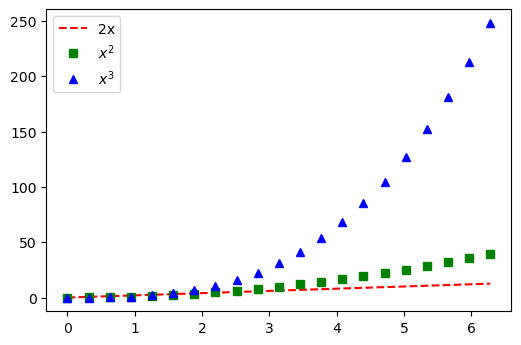

In [45]:
plt.plot(x, 2*x, "r--", label = "2x") 
plt.plot(x, x**2, "gs", label = r"$x^2$")  # формат LaTeX
plt.plot(x, x**3, "b^", label = r"$x^3$")
plt.legend()
plt.show()

Удобнее и читабельнее выделить области *subplots*

*Subplots* позволяют рисовать и размещать различные графики отдельно

Также удобно формировать легенду:

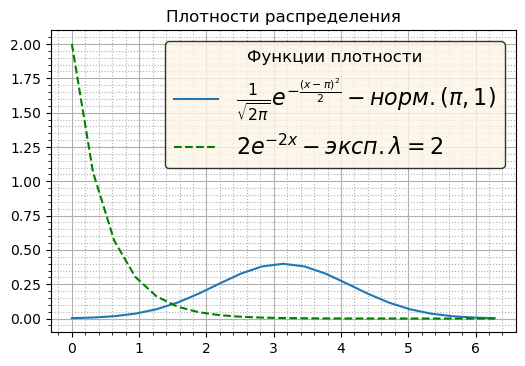

In [83]:
fig, ax = plt.subplots()

ax.plot(x, 1.0 / np.sqrt(2 * np.pi) / np.exp( np.square(x - np.pi) / 2.0 ), 
        label = r"$\frac{1}{\sqrt{2 \pi}} e^{-\frac{(x-\pi)^2}{2}} - норм. (\pi, 1)$")

ax.plot(x, 2.0 * np.exp(-2.0 * x),"g--", label = r"$2 e^{-2 x} - эксп. \lambda=2$")

ax.legend(fontsize = 16,
          ncol = 1,                     #  количество столбцов
          facecolor = "oldlace",        #  цвет области
          edgecolor = "k",              #  цвет рамки
          title = "Функции плотности",  #  заголовок
          title_fontsize = '12'         #  размер шрифта заголовка
         )
plt.title("Плотности распределения")

plt.grid(which="major")
plt.minorticks_on()
plt.grid(which="minor", linestyle=":")
plt.show()

Расположение легенды задется параметром **legend( loc = "best" )**

Значения для **loc**:
* 'upper right', 
* 'upper left', 
* 'lower left',
* 'lower right', 
* 'right', 
* 'center left', 
* 'center right', 
* 'lower center', 
* 'upper center', 
* 'center'

Параметры вида графика задаются строкой в формате **"[marker][line][color]"**

Допустимым считается также и другой порядок параметров, но возможны неточности в интерпретации!

Значения для *marker*:

* '.' - point marker
* ',' - pixel marker
* 'o' - circle marker
* 'v' - triangle_down marker
* '^' - triangle_up marker
* '<' - triangle_left marker
* '>' - triangle_right marker
* '1' - tri_down marker
* '2' - tri_up marker
* '3' - tri_left marker
* '4' - tri_right marker
* '8' - octagon marker
* 's' - square marker
* 'p' - pentagon marker
* 'P' - plus (filled) marker
* '*' - star marker
* 'h' - hexagon1 marker
* 'H' - hexagon2 marker
* '+' - plus marker
* 'x' - x marker
* 'X' - x (filled) marker
* 'D' - diamond marker
* 'd' - thin_diamond marker
* '|' - vline marker
* '_' - hline marker

Значения для *line*:

* '-' - solid line style
* '--' - dashed line style
* '-.' - dash-dot line style
* ':' - dotted line style

Значения для *color*:

* 'b' - blue
* 'g' - green
* 'r' - red
* 'c' - cyan
* 'm' - magenta
* 'y' - yellow
* 'k' - black
* 'w' - white

Если цвет - единственная составляющая параметров графика, то допускается использование полного названия цвета, например, *'green'* или шестнадцатеричного формата: *'#008000'*.

#### Диаграмма рассеяния (Scatter plot)

ax.scatter(x, y, sizes, c="color", alpha=[0..1], marker="",
           label="")

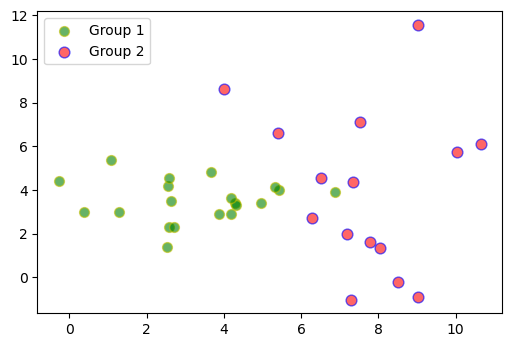

In [61]:
x1 = np.random.normal(4, 2, 20)
y1 = np.random.normal(3.6, 1, 20)

x2 = np.random.normal(7.7, 1.5, 15)
y2 = np.random.normal(4.5, 3, 15)

plt.scatter(x1, y1, 50, facecolor = "g", edgecolor = "y", alpha = 0.6, label = "Group 1")
plt.scatter(x2, y2, 60, facecolor = "r", edgecolor = "b", alpha = 0.6, label = "Group 2")

plt.legend()

plt.show()

#### Гистограмма (hist)

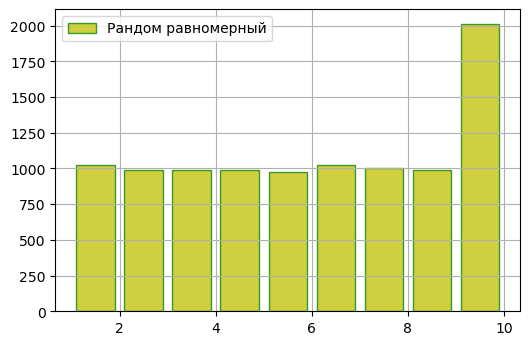

In [108]:
x = np.random.uniform(1, 11, 10000).astype(int)

plt.hist(x, bins = np.arange(1,11), rwidth = 0.8, edgecolor = "g", facecolor="y", alpha = 0.75, label="Рандом равномерный")
plt.legend()
plt.grid(which="major")
plt.show()


#### Ящик с усами (Boxplot)

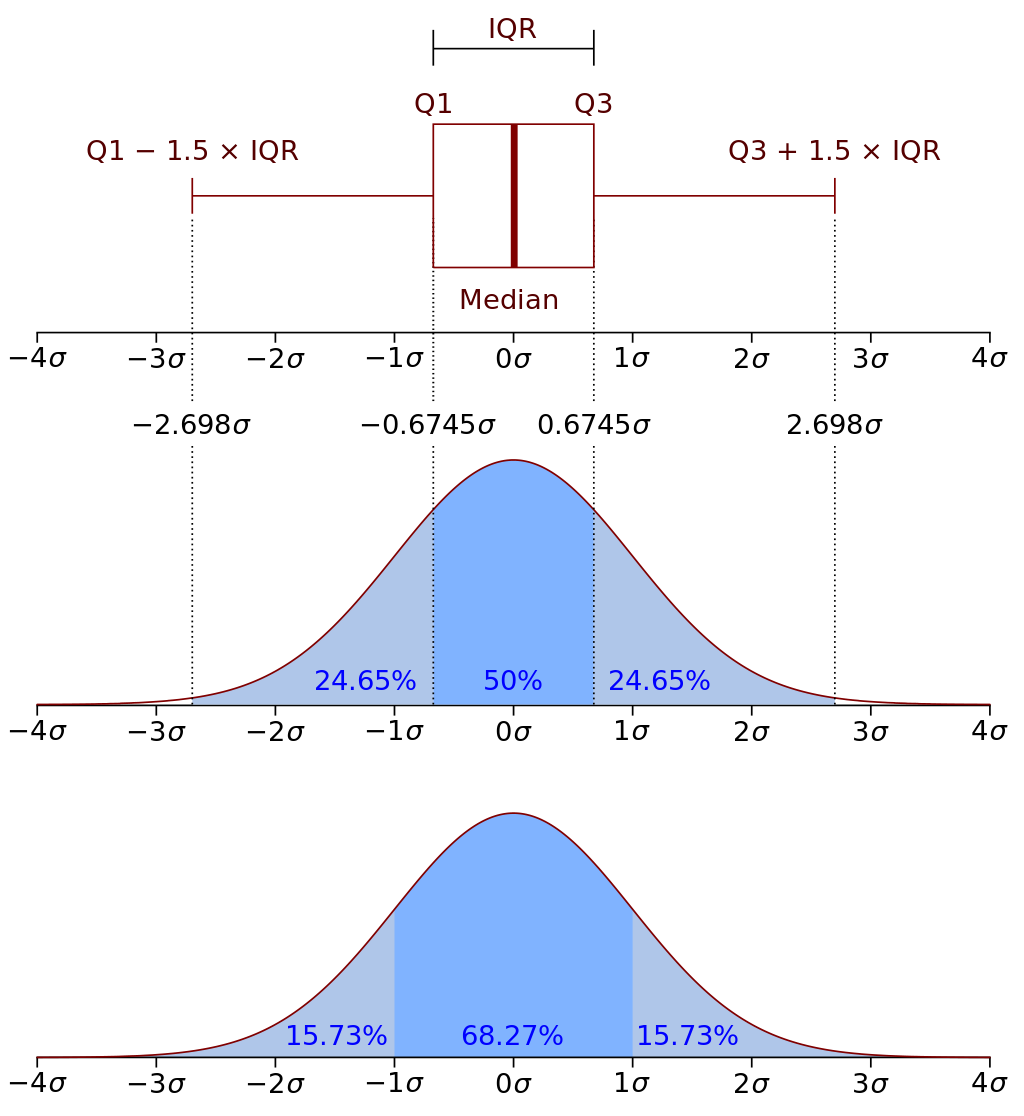

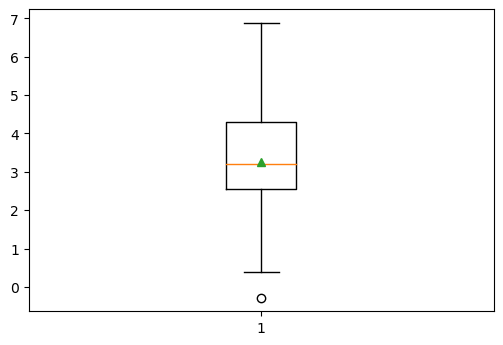

In [120]:
plt.boxplot(x1, showmeans=True)
plt.show()

---

## Средства визуализации в Pandas

### Student Alcohol Consumption

https://www.kaggle.com/datasets/uciml/student-alcohol-consumption


Загрузим набор данных напрямую из zip-архива

Выведем список файлов для их последующей загрузки

In [1]:
import pandas as pd
import zipfile
zf = zipfile.ZipFile("lec02_data.zip", "r")
zf.namelist()

['student-mat.csv', 'student-merge.R', 'student-por.csv']

Из описания следует, что два набора данных с одинаковыми признаками по студентам средних и старших классов с 
* математического курса и  (student-mat.csv)
* курса португальского языка (student-por.csv)

Извлечение файлов данных из архива:

In [2]:
with zf.open("student-mat.csv") as f:
    studMat = pd.read_csv(f)
    
with zf.open("student-por.csv") as f:
    studPor = pd.read_csv(f)

In [3]:
studMat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
studPor.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Предварительная подготовка данных

Преобразование категориальных признаков

In [35]:
#studMat.school.unique()
#studMat.school.replace({"GP": 0, "MS": 1})

0      0
1      0
2      0
3      0
4      0
      ..
390    1
391    1
392    1
393    1
394    1
Name: school, Length: 395, dtype: int64

### "Встроенные" методы визуализации

<AxesSubplot:>

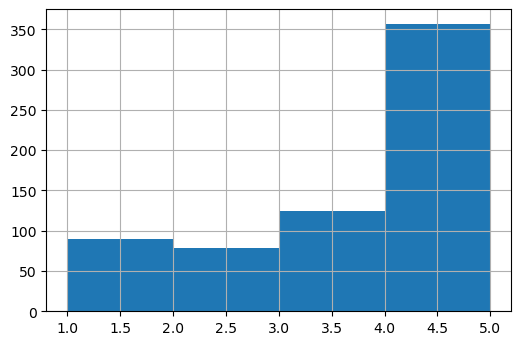

In [22]:
studPor.health.hist(bins=np.arange(1,6))

<AxesSubplot:ylabel='Density'>

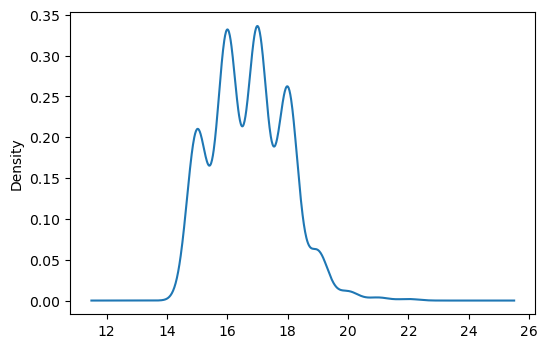

In [9]:
studPor.age.plot(kind="density") #kind = "hist"

### Библиотека Seaborn

Разработана на базе **Matplotlib** для работы непосредственно с наборами данных **Pandas**

In [23]:
import seaborn as sbn


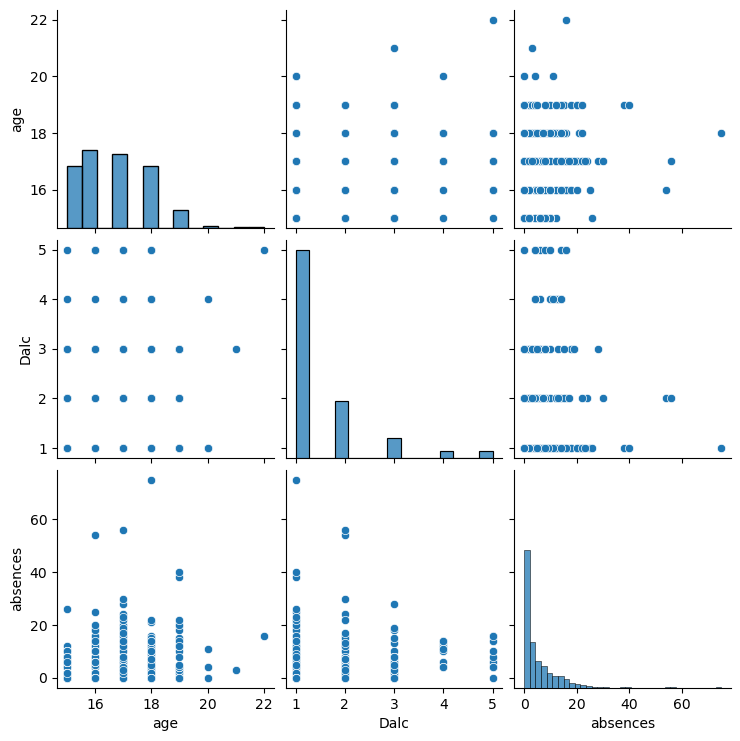

In [29]:
sbn.pairplot( studMat[["age", "Dalc", "absences"]] )

Подсчет наблюдений по категориям

/home/dimas/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


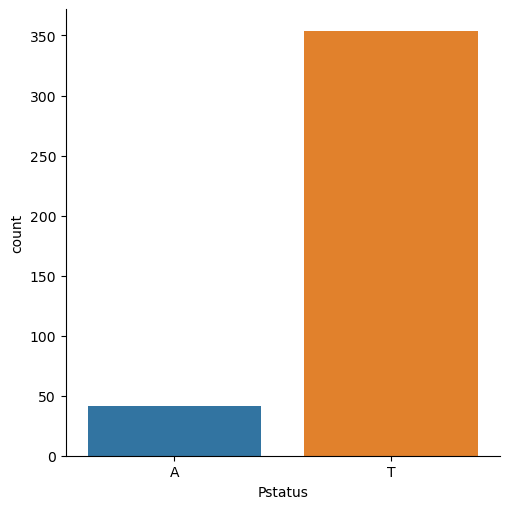

In [31]:
sbn.catplot("Pstatus", data = studMat, kind = "count")

<AxesSubplot:>

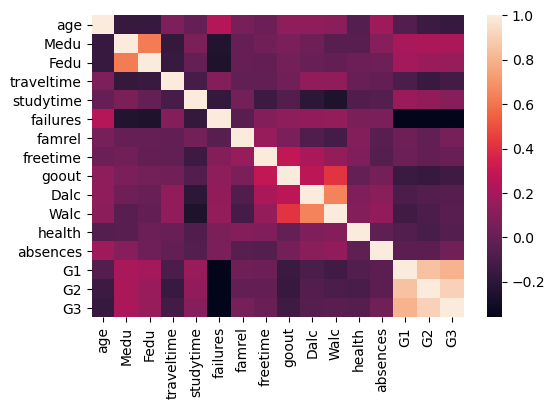

In [37]:
sbn.heatmap(studMat.corr())

<AxesSubplot:xlabel='Dalc', ylabel='age'>

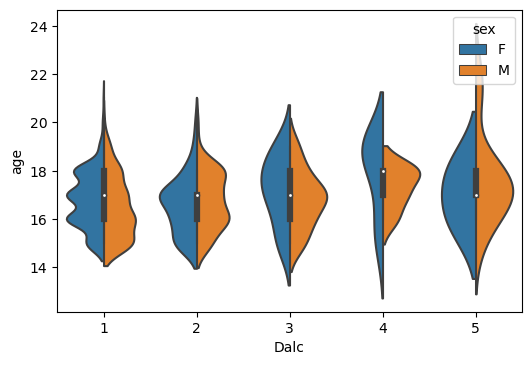

In [39]:
#x='TARGET', y='AGE', hue='GENDER', data=df, split=True);
sbn.violinplot(x = "Dalc", y = "age", hue = "sex", data = studPor, split = True)